<a href="https://colab.research.google.com/github/ShuHuiK/WIE3007_Group_Assignment/blob/yx/eda_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/ShuHuiK/WIE3007_Group_Assignment/main/data/2025_Sterling_Financial_Dataset_clean.csv"
df = pd.read_csv(url)

df.head()

,date,customer_id,location,business_sector,age,income,credit_score,savings_ratio,loan_amount,debt_to_income,credit_utilization,payment_punctuality,customer_feedback,default_history,sentiment,risk_category,customer_segment,feedback_topic
0,2025-04-15,CUST-2025000,"Iowa, US",Real Estate,39,93096.98,782,0.058,2692.74,0.133,0.93,91.49,Standard banking,0,Neutral,Medium Risk,Mass Market,General Service
1,2025-10-22,CUST-2025001,"Oklahoma, US",Retail,38,25000.00,716,0.042,43350.56,0.187,0.75,85.26,Neutral: No feedback provided.,0,Neutral,Medium Risk,Mass Market,Financial/Pricing
2,2025-02-26,CUST-2025002,"Utah, US",Services,34,42377.97,657,0.193,5856.85,0.103,0.62,84.18,Process was slow,0,Negative,Medium Risk,Mass Market,Digital/Operations
3,2025-02-26,CUST-2025003,"Missouri, US",Manufacturing,44,27556.02,606,0.136,17789.75,0.091,0.62,88.10,Excellent rates,0,Positive,Medium Risk,Mass Market,Financial/Pricing
4,2025-09-15,CUST-2025004,"South Carolina, US",Retail,49,25000.00,578,0.010,70266.78,0.229,0.90,85.24,Quick approval,0,Positive,High Risk,Mass Market,Digital/Operations


## Data Quality Checks and Preprocessing

In [6]:
df.shape

(1500, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 1500 non-null   object 
 1   customer_id          1500 non-null   object 
 2   location             1500 non-null   object 
 3   business_sector      1500 non-null   object 
 4   age                  1500 non-null   int64  
 5   income               1500 non-null   float64
 6   credit_score         1500 non-null   int64  
 7   savings_ratio        1500 non-null   float64
 8   loan_amount          1500 non-null   float64
 9   debt_to_income       1500 non-null   float64
 10  credit_utilization   1500 non-null   float64
 11  payment_punctuality  1500 non-null   float64
 12  customer_feedback    1500 non-null   object 
 13  default_history      1500 non-null   int64  
 14  sentiment            1500 non-null   object 
 15  risk_category        1500 non-null   o

Missing Values

In [8]:
df.isnull().sum()

,0
date,0
customer_id,0
location,0
business_sector,0
age,0
income,0
credit_score,0
savings_ratio,0
loan_amount,0
debt_to_income,0


No missing values are detected across all variables, indicating the dataset is complete for analysis.

Duplicate Records

In [9]:
df.duplicated().sum()

np.int64(0)

No duplicate records are found in the dataset.

Data Type Conversion

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

The 'date' column is converted from object to datetime format to ensure proper temporal handling and enable time-based analysis if required.

## Exploratory Data Analysis (EDA)

### Summary Statistics

In [18]:
df.describe()

,date,age,income,credit_score,savings_ratio,loan_amount,debt_to_income,credit_utilization,payment_punctuality,default_history
count,1500,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000
mean,2025-07-02 12:00:57.600000256,42.075333,72400.777247,680.462000,0.119035,43335.631307,0.145114,0.45852,87.329040,0.061333
min,2025-01-01 00:00:00,18.000000,25000.000000,432.000000,0.010000,11.360000,0.001000,0.08000,78.500000,0.000000
25%,2025-03-30 18:00:00,34.000000,47487.747500,630.000000,0.066000,12924.880000,0.078000,0.28000,83.577500,0.000000
50%,2025-07-05 00:00:00,42.000000,65623.445000,683.000000,0.115000,29369.940000,0.129500,0.43000,87.240000,0.000000
75%,2025-10-07 00:00:00,50.000000,90728.210000,731.000000,0.167250,61695.832500,0.195000,0.62000,91.030000,0.000000
max,2025-12-27 00:00:00,75.000000,300000.000000,850.000000,0.321000,263710.790000,0.530000,0.99000,96.500000,1.000000
std,NaN,11.452151,34185.343166,71.043893,0.068981,41835.443921,0.089134,0.22347,4.426966,0.240021


In [19]:
df[['income', 'credit_score', 'debt_to_income', 'credit_utilization']].describe()

,income,credit_score,debt_to_income,credit_utilization
count,1500.000000,1500.000000,1500.000000,1500.00000
mean,72400.777247,680.462000,0.145114,0.45852
std,34185.343166,71.043893,0.089134,0.22347
min,25000.000000,432.000000,0.001000,0.08000
25%,47487.747500,630.000000,0.078000,0.28000
50%,65623.445000,683.000000,0.129500,0.43000
75%,90728.210000,731.000000,0.195000,0.62000
max,300000.000000,850.000000,0.530000,0.99000


Summary statistics indicate that the dataset contains realistic financial characteristics. The average customer is approximately 42 years old with a mean income of around 72,000 and a mean credit score of 680, suggesting a predominantly **medium-risk customer base**. Financial variables such as income and loan amount exhibit right-skewed distributions due to the presence of high-value customers. The default rate is approximately 6%, highlighting class imbalance and reinforcing the need for evaluation metrics beyond accuracy. Overall, the ranges and distributions of key variables are consistent with real-world retail banking data.

### Numerical Feature

Income Distribution

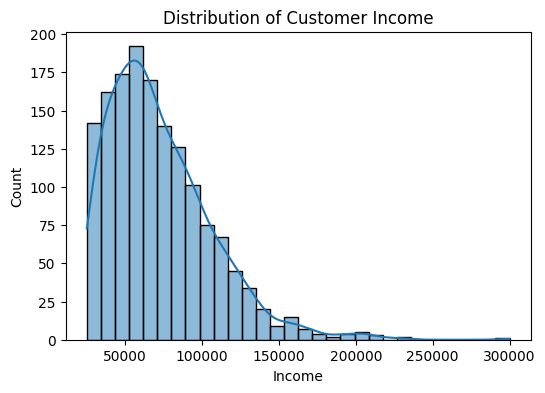

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df['income'], bins=30, kde=True)
plt.title("Distribution of Customer Income")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

Customer income is right-skewed, indicating a larger proportion of middle-income customers with fewer high-income individuals, which is typical in retail banking datasets.

Credit Score Distribution

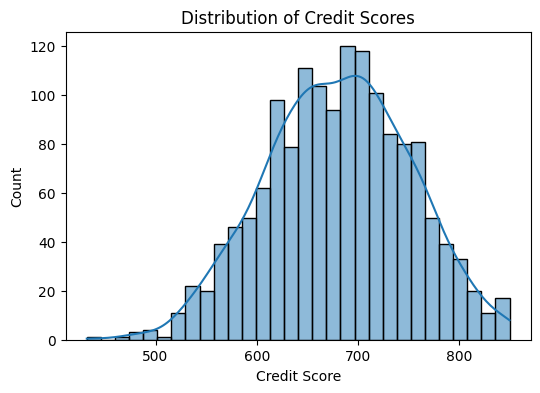

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df['credit_score'], bins=30, kde=True)
plt.title("Distribution of Credit Scores")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.show()

Most customers have credit scores within the mid to high range, suggesting a generally credit-worthy customer base.

Debit-to-Income Ratio

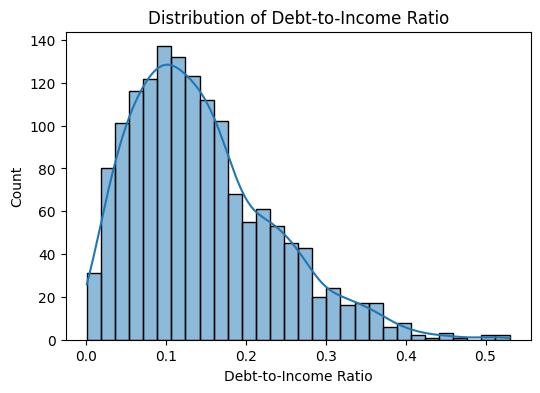

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(df['debt_to_income'], bins=30, kde=True)
plt.title("Distribution of Debt-to-Income Ratio")
plt.xlabel("Debt-to-Income Ratio")
plt.ylabel("Count")
plt.show()

The majority of customers exhibit relatively low debt-to-income ratios, indicating manageable debt levels across the dataset.

### Categorical Features

Business Sector

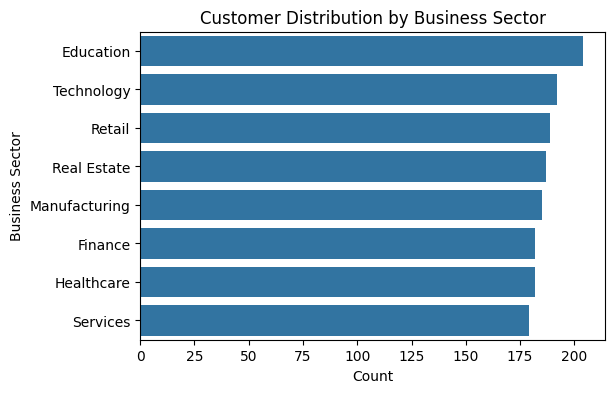

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(y=df['business_sector'], order=df['business_sector'].value_counts().index)
plt.title("Customer Distribution by Business Sector")
plt.xlabel("Count")
plt.ylabel("Business Sector")
plt.show()

Customers are relatively evenly distributed across business sectors, indicating that the simulated dataset does not overly concentrate on a single industry. This balanced representation supports fair model training without sector-specific bias.

Risk Category

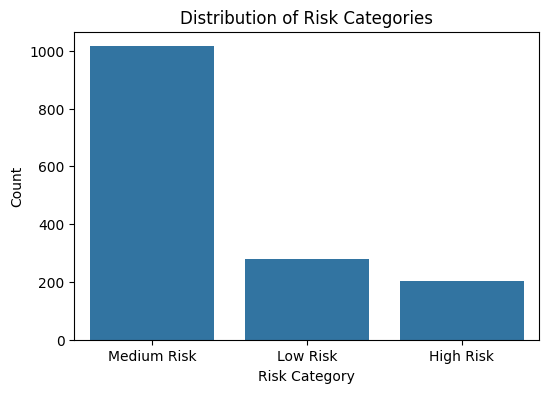

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['risk_category'], order=df['risk_category'].value_counts().index)
plt.title("Distribution of Risk Categories")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

The risk categories are not evenly distributed, with the majority of customers classified as Medium Risk. This reflects a realistic banking scenario where most customers fall within moderate risk profiles, while fewer customers are classified as low or high risk.

This imbalance may influence predictive modelling and will be considered during evaluation using metrics such as F1-score and ROC-AUC.

Default History

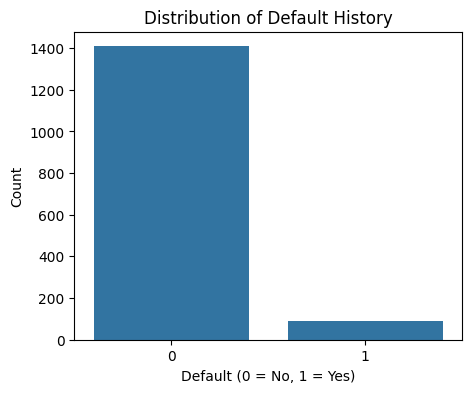

In [17]:
plt.figure(figsize=(5,4))
sns.countplot(x=df['default_history'])
plt.title("Distribution of Default History")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

The `default_history` variable represents whether a customer has previously defaulted on a loan, where 0 indicates non-default and 1 indicates default. The distribution shows that non-default cases dominate the dataset, reflecting a realistic credit risk scenario where defaults are relatively rare.

This class imbalance reinforces the need to evaluate models using metrics such as F1-score and ROC-AUC in addition to accuracy.

## Feature Relationships and Target Analysis

### Correlation Heatmap

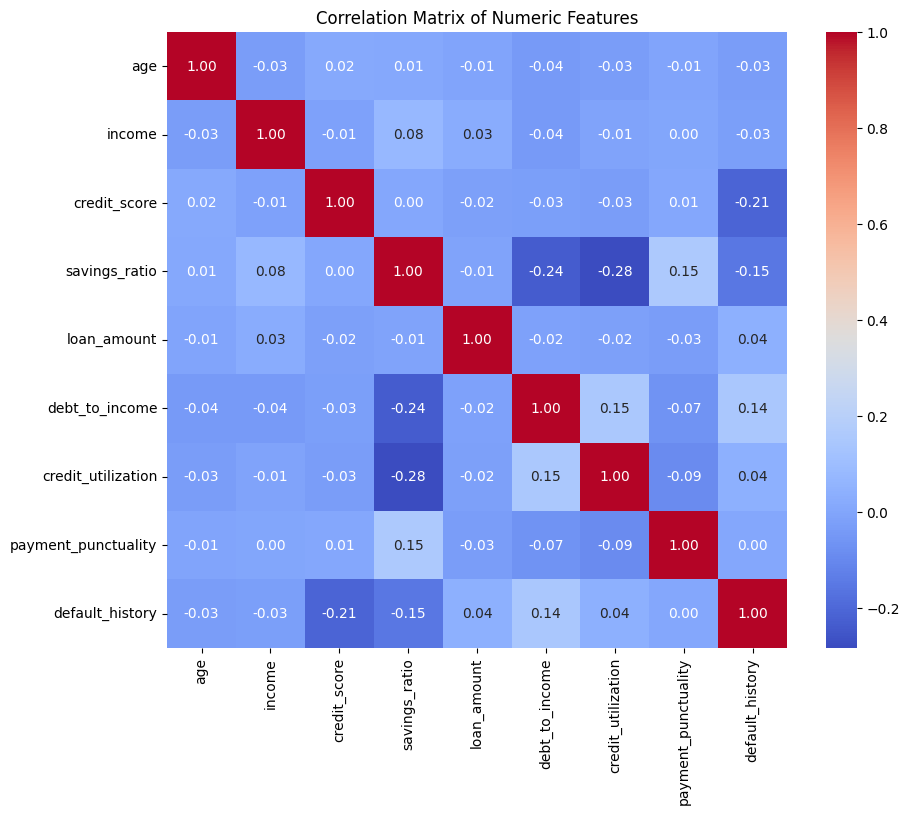

In [21]:
numeric_cols = [
    'age', 'income', 'credit_score', 'savings_ratio',
    'loan_amount', 'debt_to_income',
    'credit_utilization', 'payment_punctuality',
    'default_history'
]

corr = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

The correlation matrix shows generally weak linear relationships among the numeric features and the target variable. While no single variable exhibits strong linear correlation with default history, variables such as credit score, savings ratio, and debt-to-income ratio demonstrate meaningful directional relationships. This suggests that default risk is influenced by non-linear interactions between multiple factors, which can be effectively captured by tree-based models.

The absence of strong multicollinearity among features also reduces redundancy and supports stable model training.


### Feature vs Target Comparisons

Credit Score vs Default

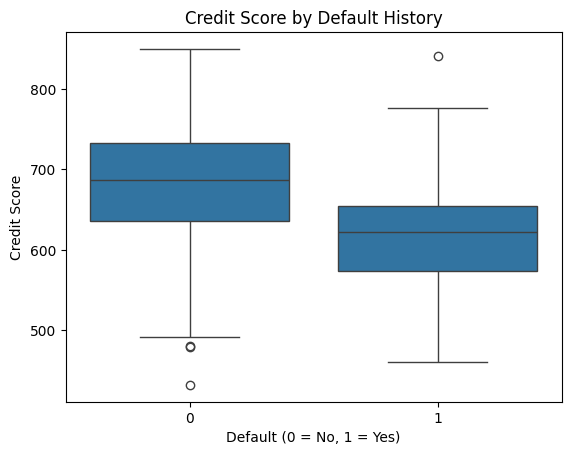

In [22]:
sns.boxplot(x='default_history', y='credit_score', data=df)
plt.title("Credit Score by Default History")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Credit Score")
plt.show()

Customers who defaulted (default = 1) generally exhibit lower credit scores compared to non-default customers. The median credit score for defaulters is noticeably lower, indicating that credit score is a strong indicator of default risk. This aligns with real-world banking practices where lower credit scores reflect higher credit risk.

Debt-to-Income vs Default

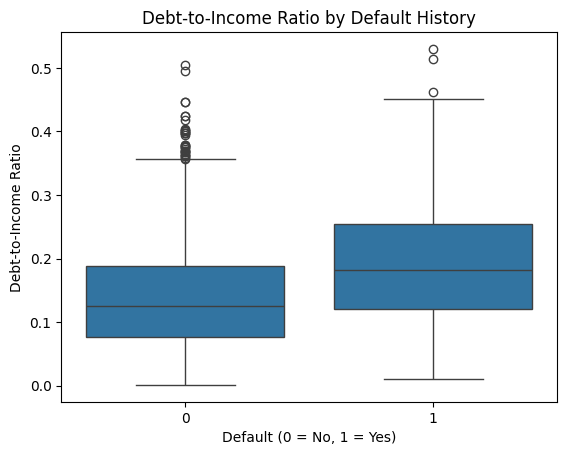

In [23]:
sns.boxplot(x='default_history', y='debt_to_income', data=df)
plt.title("Debt-to-Income Ratio by Default History")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Debt-to-Income Ratio")
plt.show()

Defaulting customers generally exhibit higher debt-to-income ratios compared to non-default customers. The distribution for defaulters shows a higher median and wider spread, indicating that customers with higher debt relative to their income have reduced financial flexibility. This reduced flexibility makes it more difficult to meet repayment obligations and therefore increasing the likelihood of default.


Credit Utilization vs Default

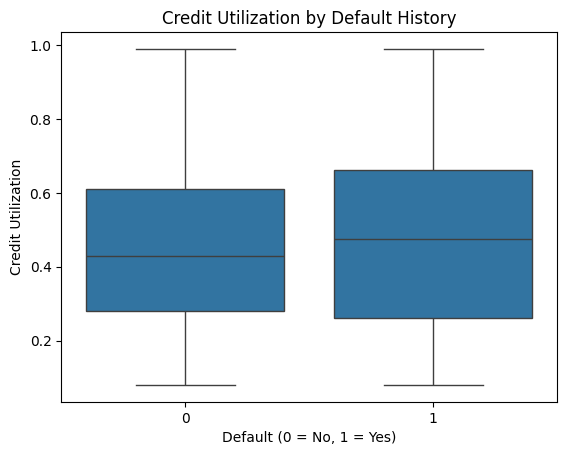

In [24]:
sns.boxplot(x='default_history', y='credit_utilization', data=df)
plt.title("Credit Utilization by Default History")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Credit Utilization")
plt.show()

Customers with a history of default generally demonstrate higher credit utilization compared to non-default customers. The distribution for defaulters shows a higher median and wider spread, indicating heavier reliance on available credit. This reduced financial buffer increases vulnerability to repayment difficulties and therefore increasing the likelihood of default.


Summary

Overall, the feature-to-target analysis highlights clear differences between defaulting and non-defaulting customers. **Lower credit scores, higher debt-to-income ratios, and higher credit utilization** are consistently associated with **increased default risk**. These findings support the relevance of these variables in the baseline decision tree model and subsequent predictive modelling.

## Decision Tree Baseline Model

### Feature Selection & Preprocessing

In [25]:
X = df.drop(columns=['default_history'])
y = df['default_history']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

numeric_features = [
    'age', 'income', 'credit_score', 'savings_ratio',
    'loan_amount', 'debt_to_income',
    'credit_utilization', 'payment_punctuality'
]

categorical_features = [
    'business_sector', 'sentiment',
    'risk_category', 'customer_segment', 'feedback_topic'
]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# stratify=y is important due to class imbalance

In [28]:
# preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [29]:
# train decision tree model
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        random_state=42,
        max_depth=5
    ))
])

dt_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'income',
                                                   'credit_score',
                                                   'savings_ratio',
                                                   'loan_amount',
                                                   'debt_to_income',
                                                   'credit_utilization',
                                                   'payment_punctuality']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['business_sector',
                                                   'sentiment', 'risk_category',
                                                   'customer_segment',
                                                   'feedback_topic'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [30]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

accuracy, f1, roc_auc

(0.9266666666666666, 0.15384615384615385, np.float64(0.6533687943262411))

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       282
           1       0.25      0.11      0.15        18

    accuracy                           0.93       300
   macro avg       0.60      0.54      0.56       300
weighted avg       0.90      0.93      0.91       300



While the baseline decision tree achieves high overall accuracy, it struggles to identify default cases, as reflected by the low recall and F1-score for the minority class. This behaviour is expected given the class imbalance in the dataset.

## Decision Tree Interpretation and Feature Importance

Feature Importance

In [32]:
dt_clf = dt_model.named_steps['classifier']

# Get feature names after preprocessing
ohe = dt_model.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_features = ohe.get_feature_names_out(categorical_features)

feature_names = numeric_features + list(encoded_cat_features)

# Create feature importance dataframe
feature_importance_df = (
    pd.DataFrame({
        'feature': feature_names,
        'importance': dt_clf.feature_importances_
    })
    .sort_values(by='importance', ascending=False)
)

feature_importance_df.head(10)

,feature,importance
5,debt_to_income,0.286026
2,credit_score,0.194259
7,payment_punctuality,0.153666
6,credit_utilization,0.114219
3,savings_ratio,0.111113
4,loan_amount,0.071770
0,age,0.036112
12,business_sector_Real Estate,0.030508
1,income,0.002326
8,business_sector_Education,0.000000


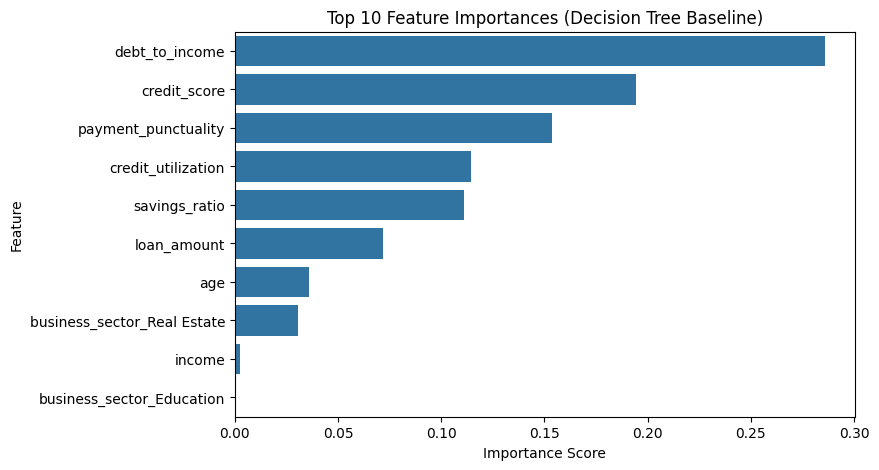

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=feature_importance_df.head(10),
    x='importance',
    y='feature'
)
plt.title("Top 10 Feature Importances (Decision Tree Baseline)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

Debt-to-income ratio is the most influential feature in the decision tree model. This indicates that the proportion of a customer’s income committed to debt repayments plays a critical role in default prediction. Customers with higher debt burdens relative to income have reduced repayment capacity, making them more vulnerable to default.

Although the decision tree identifies meaningful predictors of default risk, its performance on default cases remains limited due to strong class imbalance. As the baseline model was trained without imbalance handling, it tends to prioritise majority class patterns, resulting in lower recall for defaulters.

Overall, the feature importance results show that financial factors such as debt-to-income ratio, credit score, and repayment behaviour are the main drivers of default prediction in the baseline decision tree model. The model relies more heavily on income-related and behavioural features than on demographic or business sector information. While the decision tree is easy to interpret and provides useful insights into credit risk, its limited ability to detect default cases highlights the need for imbalance-aware models in later stages.
